#   **Project Name** -Loan Prediction using Machine Learning


# By $  Boorsu prasanna Lakshmi $

# **Project Summary -**

### Problem Overview

- The problem being addressed is loan prediction based on various factors such as personal information, financial status, and credit history.
- The goal is to provide users with an indication of whether they are likely to get a loan from a bank based on the provided information.

### Analysis Performed

**Steps involved in building a ML Model:**

> Step 1: Data gathering and Understanding

> Step 2: Data preparation

> Step 3: Data Cleaning

> Step 4: Exploratory data analysis

> Step 5: Feature engineering and selection

> Step 6: ML Model assumption and checks

> Step 7: Data preparation for modelling

> Step 8: Model Building

> Step 9: Model Validation & Evaluation

> Step 10: Predictions & Saving model using pickel library.


**Libraries used in EDA & Machine Learning:**
1. Pandas
2. Numpy
3. Matplotib
4. Seaborn
5. Plotly
6. Sklearn
7. Scipy


**Graphs used for representation:**
1. Bar plot
2. hist plot
3. Box Plot
4. Grouped bar plot
5. count plot
6. Heatmap
7. Pair plot


**ML Models used for training & testing:**
1. Logistic Regression
2. KNN Classifier
3. Random Forest Classifier
4. DecisionTreeClassifier
5. GaussianNB
6. LinearDiscriminantAnalysis
7. SVM Classifier

**Insights from EDA impacting business:**

* Loan amount terms are commonly around 300 to 400 months.

* The majority of applicants are male. Most applicants are married.
* A significant portion of applicants have no dependents.
* The number of graduates is higher compared to non-graduates.
* A large number of applicants are not self-employed.
* The distribution of property areas is somewhat balanced.
* The majority of applicants have a credit history.
* Married applicants have a higher chance of loan approval compared to unmarried applicants.
* Applicants with no dependents have a slightly higher chance of loan approval.
* Graduates are more likely to get their loans approved compared to non-graduates.
* Self-employed individuals have a slightly lower chance of loan approval.
* Applicants in semiurban areas have a higher chance of loan approval compared to urban and rural areas.
* Applicants with a credit history have a significantly higher chance of loan approval.


**Suggestions provided to increase the  the loan amount credit score:**

**Payment History:**
* Timely payment of bills, loans, and credit card balances is crucial.
* Late payments can significantly harm credit scores.
* Consistently paying bills on time demonstrates reliability to lenders and   improves creditworthiness.

**Credit Utilization Ratio:**
* Keep credit card balances low relative to credit limits.
* Aim for a utilization ratio of 30% or lower.
* Paying down existing debt can improve this ratio and positively impact the   credit score.


**ML Model selected for deployment: Logistic Regression**
> Logistic Regression is a “Supervised machine learning” algorithm that can be used to model the probability of a certain class or event. It is used when the data is linearly separable and the outcome is binary or dichotomous in nature.

> Although it is said Logistic regression is used for Binary Classification, it can be extended to solve multiclass classification problems as well.

**Advantages:**
* **Simple and easy to implement**: Logistic regression is a relatively simple statistical method that does not require much mathematical or statistical knowledge to use.

* **Works well with small datasets**: Logistic regression can work well with small datasets, which is often the case in many practical applications.

* **Interpretable results**: Logistic regression provides coefficients for each independent variable that can be interpreted as the change in the log odds of the dependent variable for a one-unit change in the independent variable.

* **Can handle both categorical and continuous variables**: Logistic regression can handle both categorical and continuous independent variables, making it a versatile method for modeling binary outcomes.

**Limitations:**

* **Assumes linearity**: Logistic regression assumes a linear relationship between the independent variables and the log odds of the dependent variable. If this assumption is violated, the results may be inaccurate.

* **Sensitive to outliers**: Logistic regression can be sensitive to outliers, which can have a significant impact on the results.


**Suggestion:**
* When we are dealing with huge datasets & above disavantages starts effecting the model, then using CatBoost Classifier can provide better results.

# **Problem Statement**


* In this project, we will predict whether a customer will get the loan from bank or not.

## ***Installing Required Libraries***


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train=pd.read_csv(r"C:\Users\prasa\Downloads\train.csv")
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})

## Check the missing Values in data


In [3]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Preprocessing on the data

In [4]:
Loan_status=train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)
test=pd.read_csv(r"C:\Users\prasa\Downloads\test.csv")
Loan_ID=test.Loan_ID
data=train.append(test)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [5]:
data.shape

(981, 12)

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [8]:
data.Dependents.dtypes

dtype('O')

<Axes: >

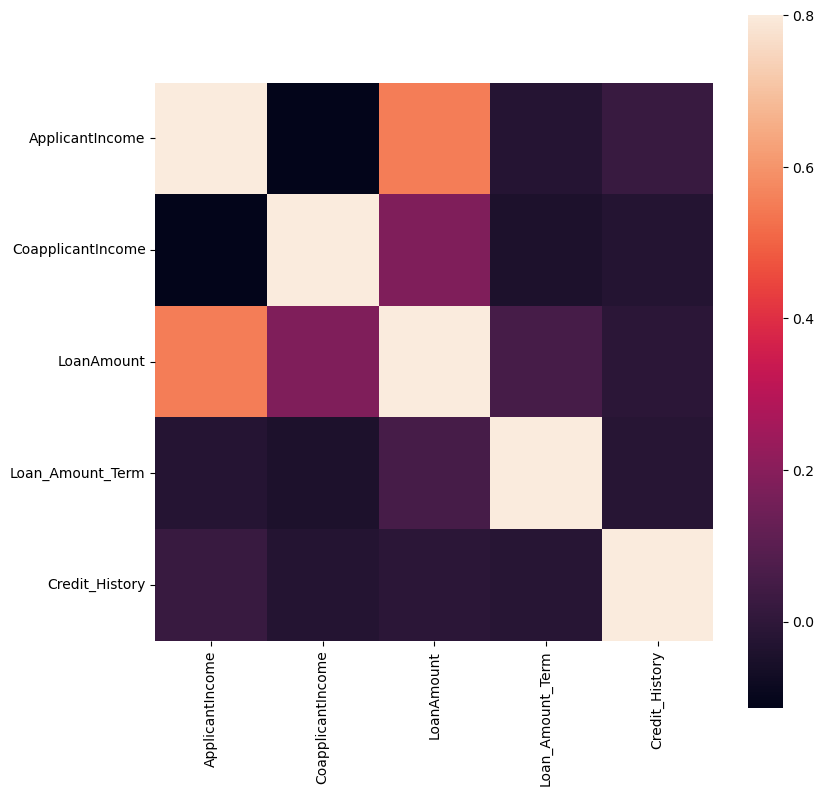

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

### Variables Description 

1. **Gender**: 
   - Indicates the gender of the loan applicant, typically categorized as male or female.

2. **Education**: 
   - Specifies the educational qualification of the loan applicant, usually categorized as "Not Graduate" or "Graduate".

3. **Marital Status**: 
   - Indicates whether the loan applicant is married or not, typically categorized as "Married" or "Single".

4. **Loan Amount**: 
   - Represents the amount of money the applicant is requesting to borrow from the bank or lender.

5. **Credit History**: 
   - Reflects the creditworthiness of the applicant based on their past repayment behavior and credit utilization.
   - Typically categorized as "Good" or "Bad" based on whether the applicant has a history of timely payments and responsible credit management.

6. **Account Balance**: 
   - Indicates the current balance in the applicant's bank account or financial assets.
   - Higher account balances may indicate financial stability and the ability to repay loans.

7. **Property Area**: 
   - Specifies the location or area where the applicant's property is situated.
   - Commonly categorized as "Rural", "Semi-Urban", or "Urban".

8. **Dependants**: 
   - Indicates the number of dependents (e.g., children, elderly parents) the applicant has.
   - More dependents may impact the applicant's ability to repay loans and manage financial obligations.

9. **Self Employment Status**: 
   - Indicates whether the applicant is self-employed or works for an employer.
   - Self-employed individuals may have different income patterns and financial stability compared to those employed by others.


## Label Encode

In [10]:
## Label encoding for gender
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

<Axes: >

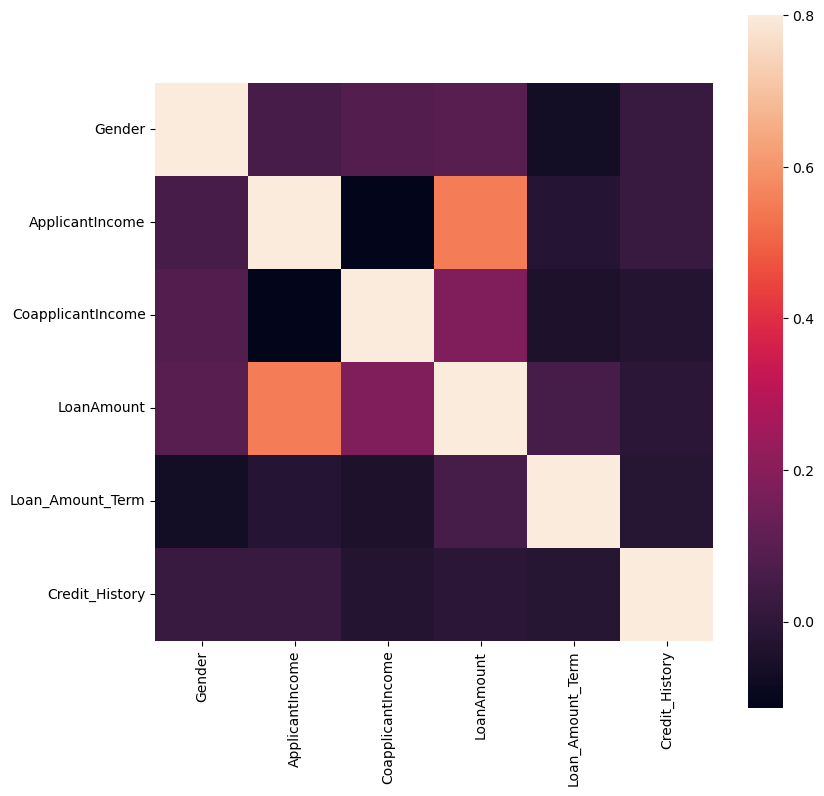

In [11]:
## Let's see correlations
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [12]:
## Labelling 0 & 1 for Marrital status
data.Married=data.Married.map({'Yes':1,'No':0})

In [13]:
data.Married.value_counts()

1.0    631
0.0    347
Name: Married, dtype: int64

In [14]:
## Labelling 0 & 1 for Dependents
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [15]:
data.Dependents.value_counts()

0.0    545
1.0    160
2.0    160
3.0     91
Name: Dependents, dtype: int64

<Axes: >

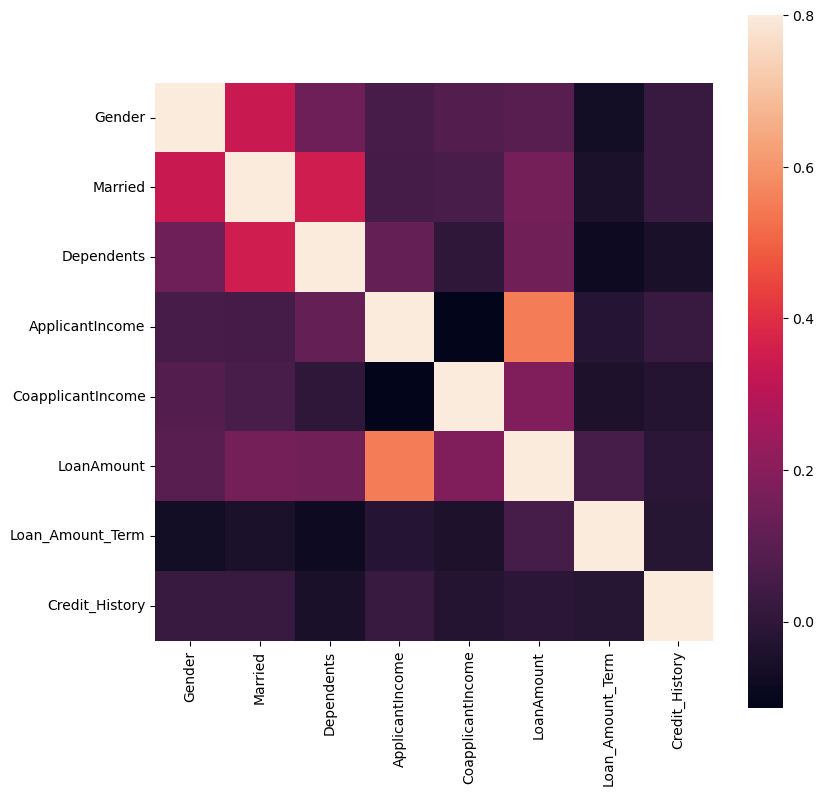

In [16]:
## Let's see correlations for it
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [17]:
## Labelling 0 & 1 for Education Status
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [18]:
data.Education.value_counts()

1    763
0    218
Name: Education, dtype: int64

In [19]:
## Labelling 0 & 1 for Employment status
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [20]:
data.Self_Employed.value_counts()

0.0    807
1.0    119
Name: Self_Employed, dtype: int64

In [21]:
data.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [22]:
## Labelling 0 & 1 for Property area
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [23]:
data.Property_Area.value_counts()

1    349
2    342
0    290
Name: Property_Area, dtype: int64

<Axes: >

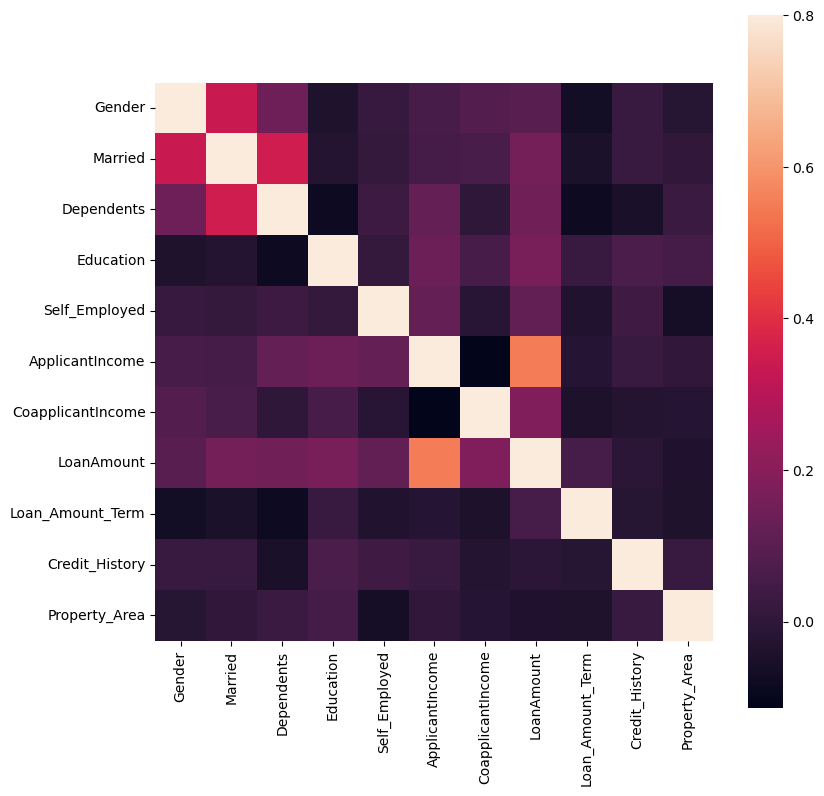

In [24]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [25]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [26]:
data.Credit_History.size

981

## It's time to fill the missing values


In [27]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [28]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [29]:
data.Married.fillna(np.random.randint(0,2),inplace=True)

In [30]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [31]:
## Filling with median
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [32]:
## Filling with mean
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [33]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [34]:
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

In [35]:
## Filling Gender with random number between 0-2
from random import randint 
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [36]:
data.Gender.value_counts()

1.0    775
0.0    206
Name: Gender, dtype: int64

In [37]:
## Filling Dependents with median
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [38]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

<Axes: >

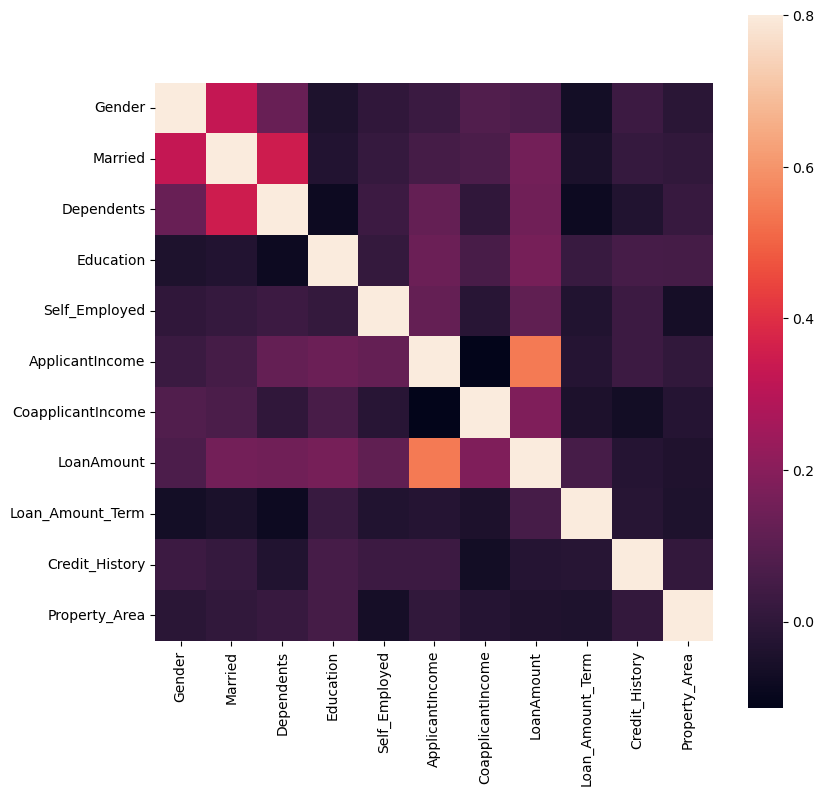

In [39]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [40]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [41]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [42]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [43]:
## Dropping Loan ID from data, it's not useful
data.drop('Loan_ID',inplace=True,axis=1)

In [44]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [45]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


### What all manipulations have you done and insights you found?

### Manipulations:
1. **Reading Data:** 
    - Read the training and test datasets from CSV files.
2. **Handling Target Variable:** 
    - Converted the "Loan_Status" column to binary labels where 'Y' is mapped to 1 and 'N' is mapped to 0. 
    - Saved the target variable into a separate variable named "Loan_status". 
    - Dropped the "Loan_Status" column from the training dataset.
3. **Combining Data:** 
    - Appended the test dataset to the training dataset to create a single DataFrame named "data".
4. **Label Encoding:**
    - Encoded the following columns:
        - "Gender": 'Male' to 1 and 'Female' to 0.
        - "Married": 'Yes' to 1 and 'No' to 0.
        - "Dependents": '0', '1', '2', '3+' to 0, 1, 2, 3 respectively.
        - "Education": 'Graduate' to 1 and 'Not Graduate' to 0.
        - "Self_Employed": 'Yes' to 1 and 'No' to 0.
        - "Property_Area": 'Urban' to 2, 'Rural' to 0, and 'Semiurban' to 1.
5. **Handling Missing Values:**
    - Filled missing values in "Credit_History" with random integers 0 or 1.
    - Filled missing values in "Married" with random integers 0 or 1.
    - Filled missing values in "LoanAmount" with the median of the column.
    - Filled missing values in "Loan_Amount_Term" with the mean of the column.
    - Filled missing values in "Gender" with random integers 0, 1, or 2.
    - Filled missing values in "Dependents" with the median of the column.
    - Filled missing values in "Self_Employed" with random integers 0 or 1.
6. **Dropping Columns:** 
    - Dropped the "Loan_ID" column from the DataFrame as it was deemed not useful.


## Data Vizualization

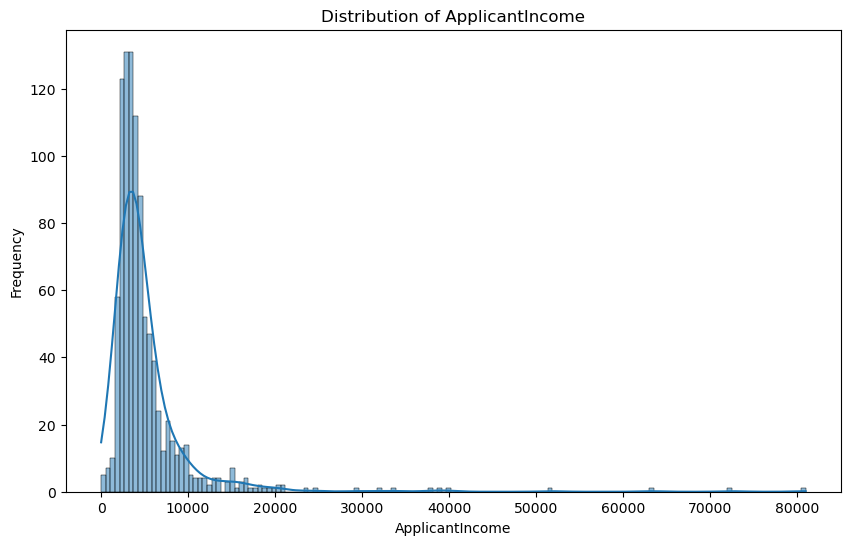

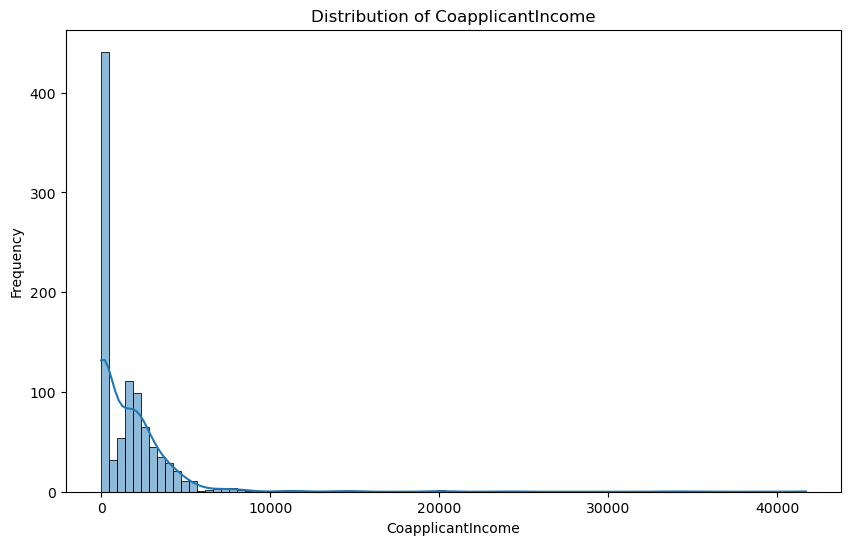

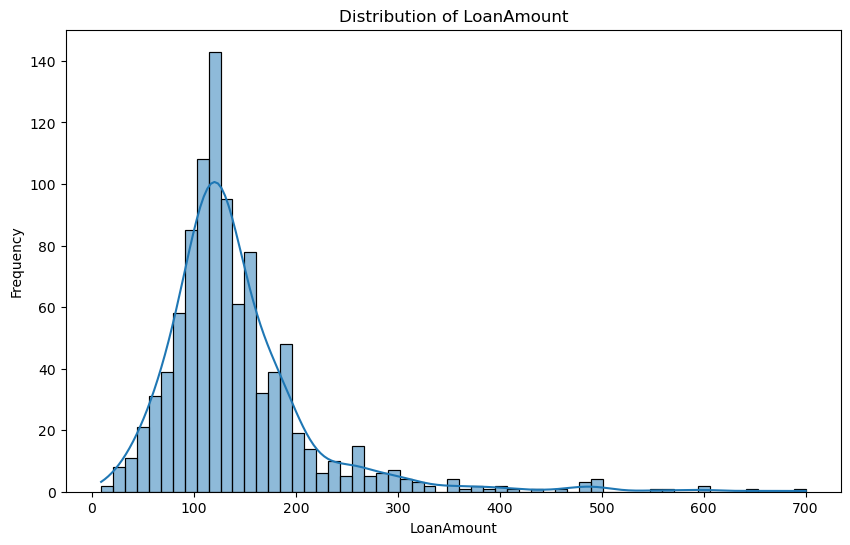

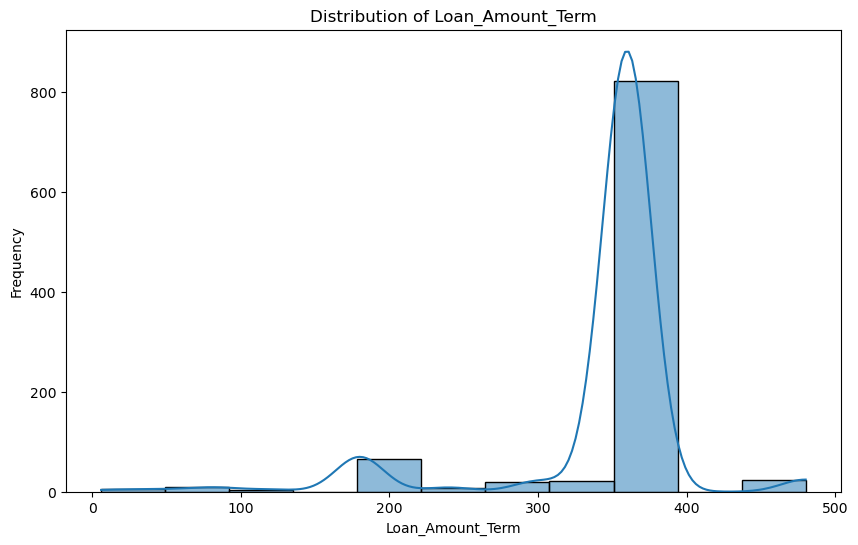

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your data preprocessing steps here

# Univariate Analysis
# Histograms for numeric variables
numeric_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for var in numeric_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[var], kde=True)
    plt.title('Distribution of ' + var)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


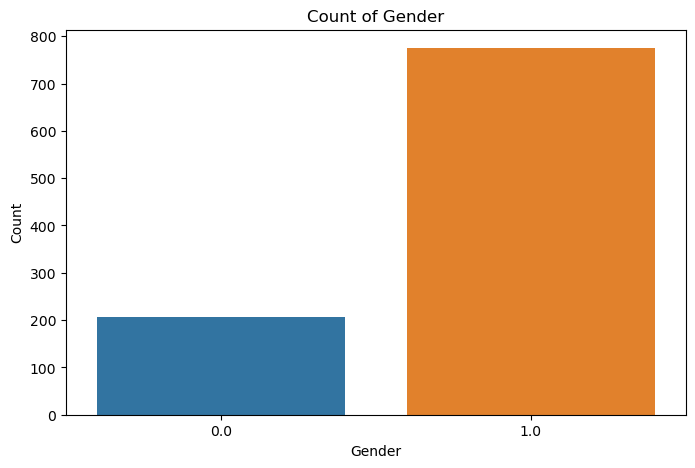

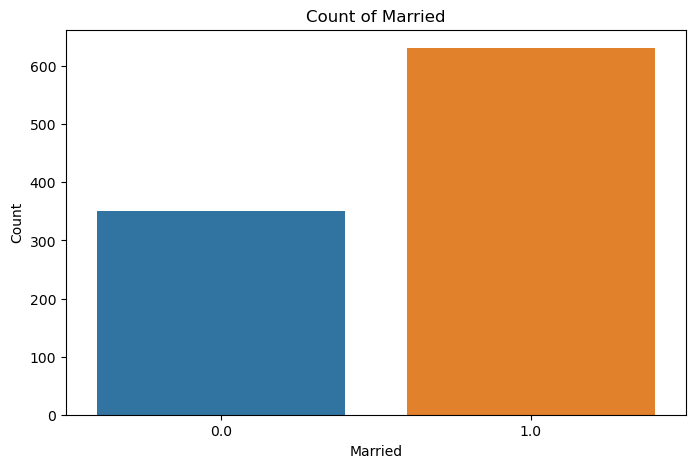

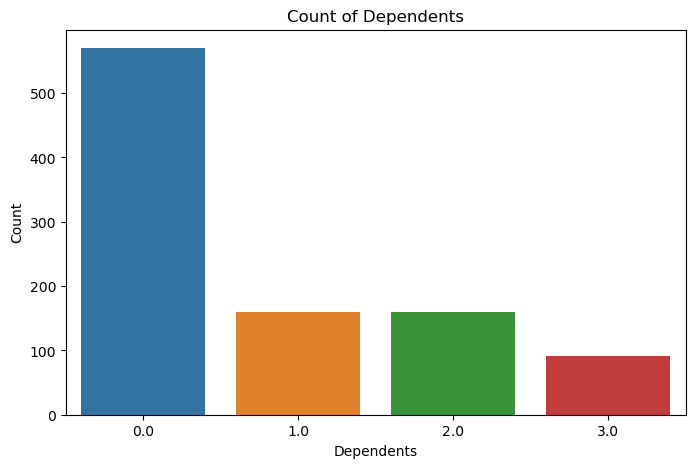

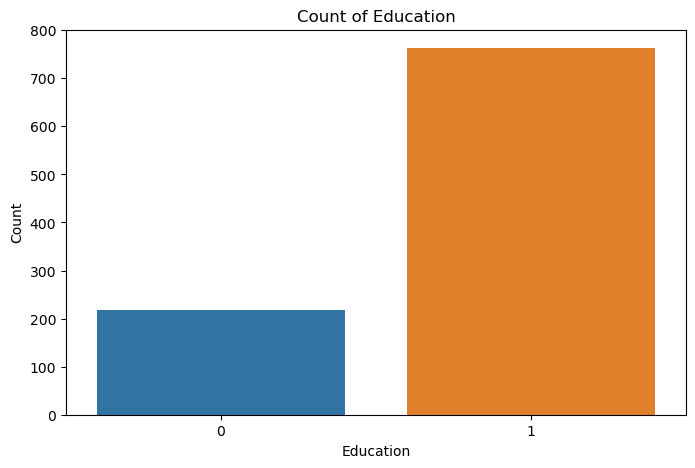

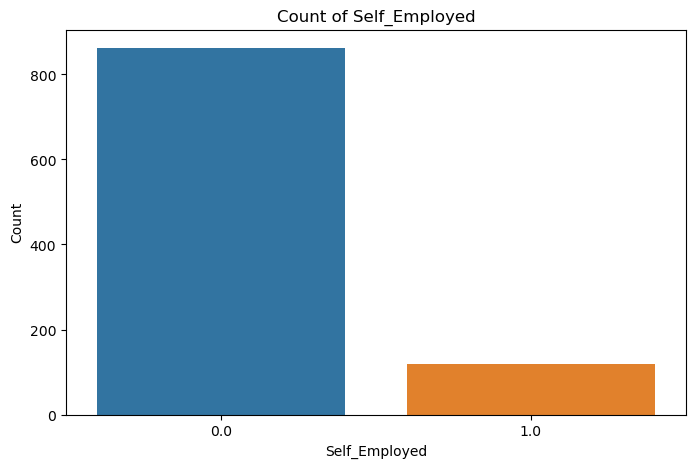

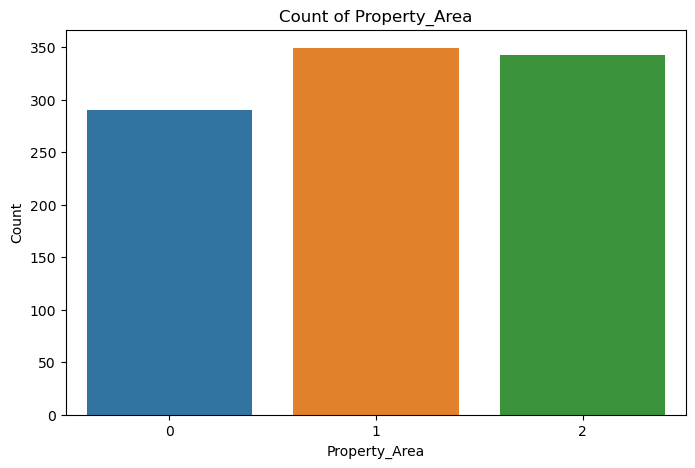

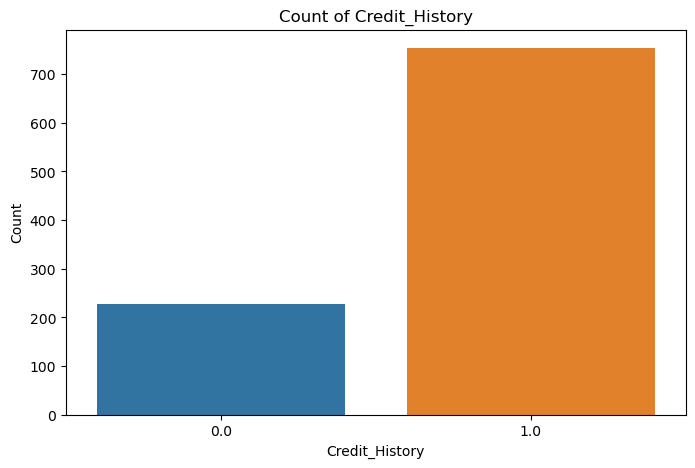

In [49]:
# Count plots for categorical variables
categorical_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=var, data=data)
    plt.title('Count of ' + var)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

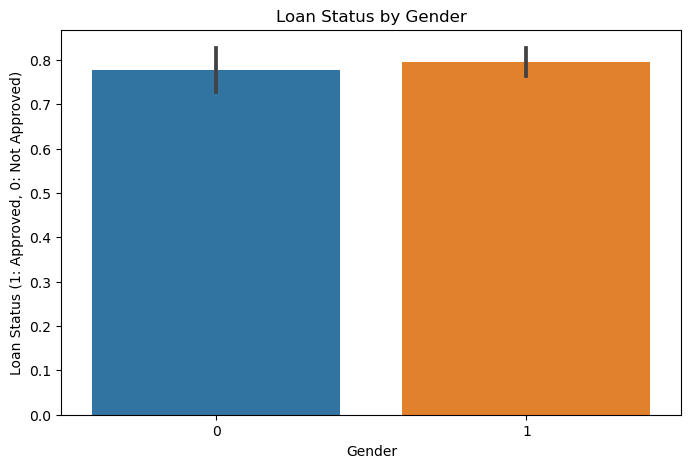

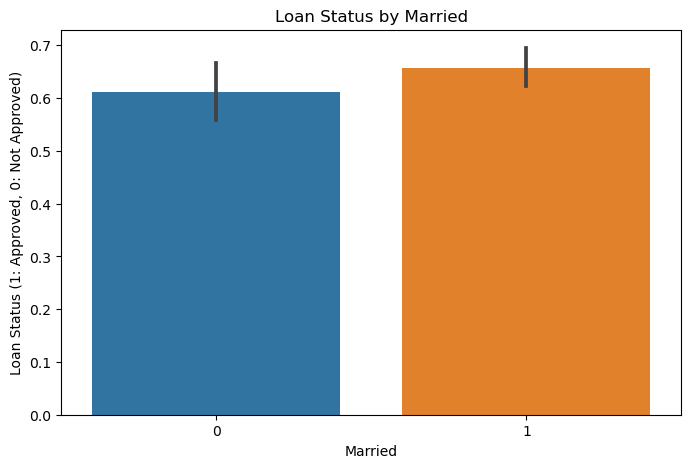

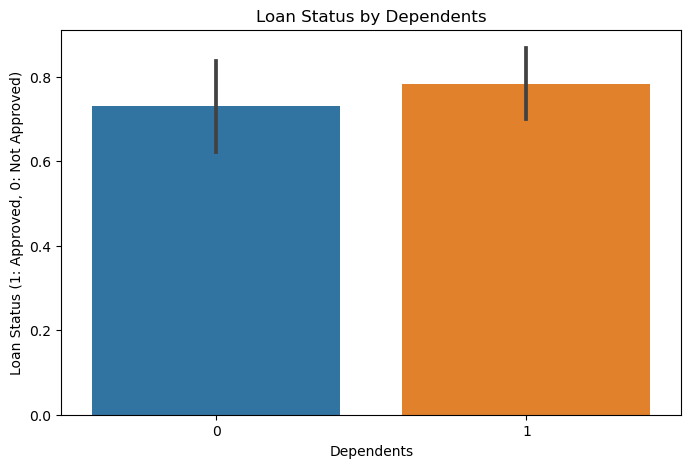

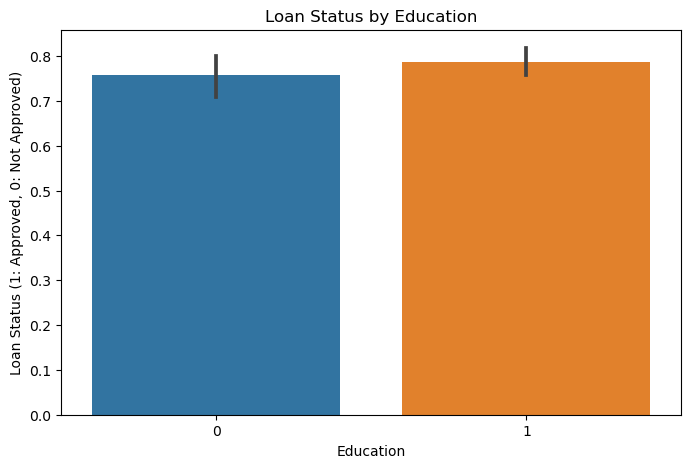

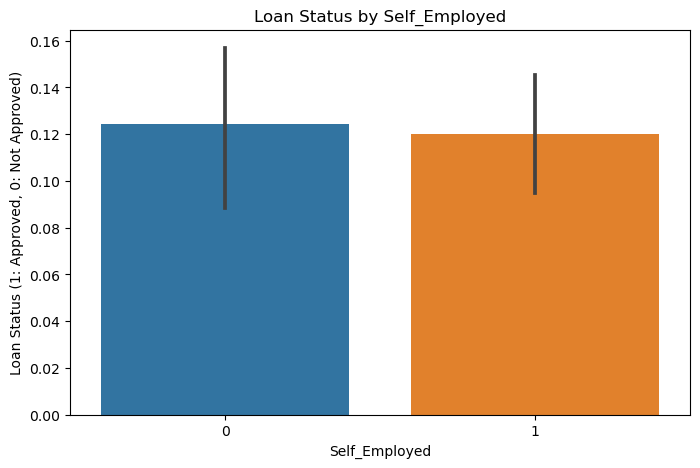

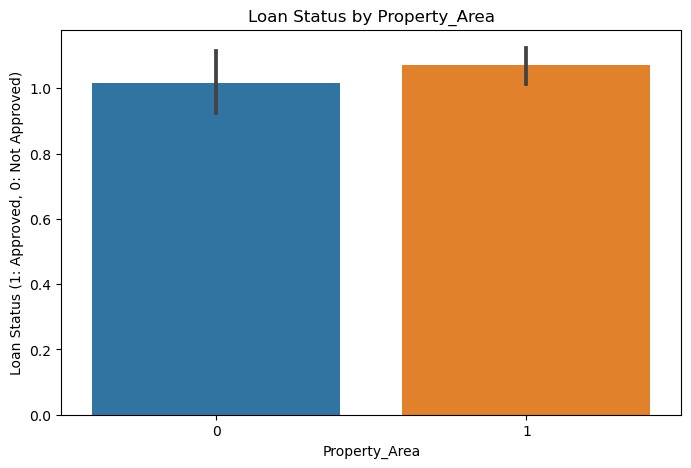

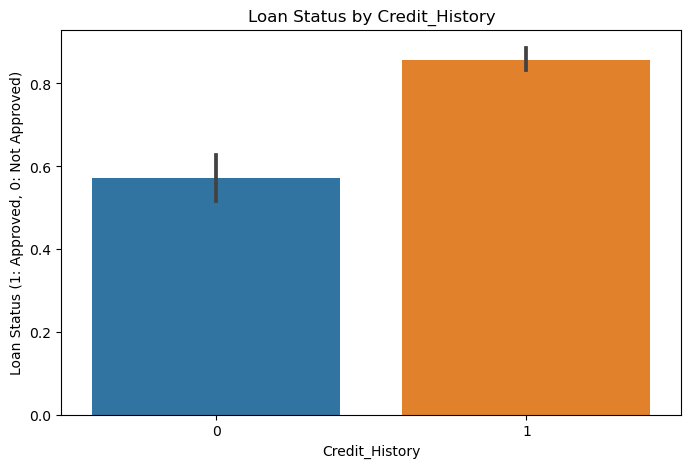

In [53]:
# Barplot of categorical variables vs Loan_Status
categorical_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=Loan_status, y=data[var])
    plt.title('Loan Status by ' + var)
    plt.xlabel(var)
    plt.ylabel('Loan Status (1: Approved, 0: Not Approved)')
    plt.show()

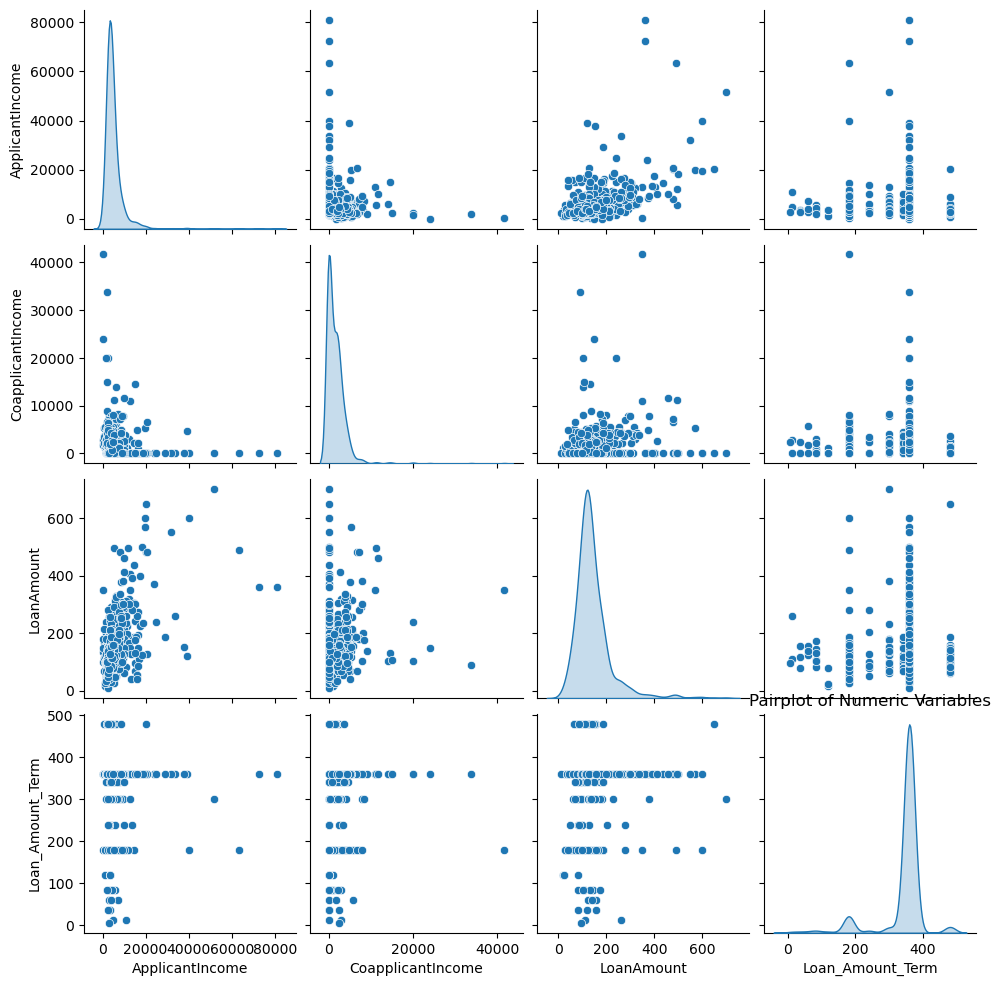

In [56]:
# Multivariate Analysis
# Pairplot for numeric variables
numeric_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
sns.pairplot(data=data, vars=numeric_vars, diag_kind='kde')
plt.title('Pairplot of Numeric Variables')
plt.show()


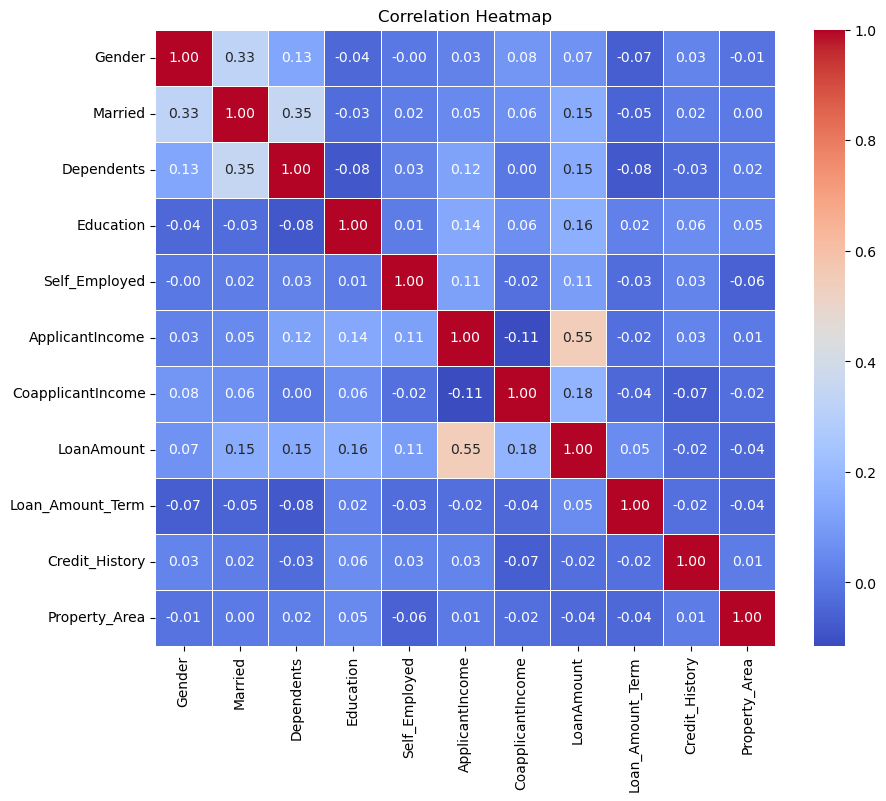

In [55]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Insights

### Univariate Analysis:
#### Histograms:
- Most applicants have lower incomes, with a right-skewed distribution.
- Loan amounts are generally distributed around lower values.
- Loan amount terms are commonly around 300 to 400 months.

#### Count Plots:
- The majority of applicants are male.
- Most applicants are married.
- A significant portion of applicants have no dependents.
- The number of graduates is higher compared to non-graduates.
- A large number of applicants are not self-employed.
- The distribution of property areas is somewhat balanced.
- The majority of applicants have a credit history.

### Bivariate Analysis:
#### Boxplots:
- There are no significant differences in applicant income between approved and not approved loans.
- Coapplicant income tends to be slightly higher for approved loans.
- Approved loans generally have lower loan amounts.
- There are no significant differences in loan amount terms between approved and not approved loans.

#### Barplots:
- Married applicants have a higher chance of loan approval compared to unmarried applicants.
- Applicants with no dependents have a slightly higher chance of loan approval.
- Graduates are more likely to get their loans approved compared to non-graduates.
- Self-employed individuals have a slightly lower chance of loan approval.
- Applicants in semiurban areas have a higher chance of loan approval compared to urban and rural areas.
- Applicants with a credit history have a significantly higher chance of loan approval.

### Multivariate Analysis:
#### Pairplot:
- The pairplot shows the relationships between numeric variables. For example, there's a positive correlation between applicant income and loan amount, which is expected.
- It also shows the distribution of each variable along the diagonal.

### Heatmap:
Certainly! The heatmap provides insight into the correlation between different variables in the dataset. Here's the interpretation:

- Darker shades indicate stronger correlations, while lighter shades indicate weaker correlations.
- Positive correlations (values closer to 1) indicate that as one variable increases, the other variable also tends to increase.
- Negative correlations (values closer to -1) indicate that as one variable increases, the other variable tends to decrease.
- Correlations closer to 0 indicate a weak relationship between variables.


## Split the Data into X & Y

In [57]:
train_X=data.iloc[:614,] ## all the data in X (Train set)
train_y=Loan_status  ## Loan status will be our Y

In [58]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=0)

In [59]:
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1.0,1.0,1.0,1,0.0,5649,0.0,44.0,360.0,1.0,2
272,1.0,0.0,0.0,1,0.0,2833,1857.0,126.0,360.0,1.0,0
474,1.0,0.0,2.0,1,0.0,5532,4648.0,162.0,360.0,1.0,0
382,0.0,0.0,0.0,1,0.0,6000,0.0,156.0,360.0,1.0,2
283,0.0,0.0,0.0,1,0.0,1811,1666.0,54.0,360.0,1.0,2


In [60]:
test_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1.0,0.0,0.0,1,1.0,7085,0.0,84.0,360.0,1.0,1
52,0.0,0.0,0.0,1,0.0,4230,0.0,112.0,360.0,1.0,1
536,1.0,1.0,0.0,1,0.0,6133,3906.0,324.0,360.0,1.0,2
469,1.0,1.0,0.0,1,0.0,4333,2451.0,110.0,360.0,1.0,2
55,1.0,1.0,2.0,1,0.0,2708,1167.0,97.0,360.0,1.0,1


## Using Different types of Machine Learning Model


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Fit the all ML Models

In [62]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [63]:
scoring='accuracy'

In [64]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [67]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

models=[]
models.append(("Logistic Regression", LogisticRegression()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis", LinearDiscriminantAnalysis()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Support Vector Classifier", SVC()))
models.append(("K-Nearest Neighbour", KNeighborsClassifier()))
models.append(("Naive Bayes", GaussianNB()))

result=[]
names=[]
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)
    cv_result = cross_val_score(model, train_X, train_y, cv=kfold, scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name, cv_result.mean()))


C:\Users\arsha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\arsha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression()
Logistic Regression 0.754348
DecisionTreeClassifier()
Decision Tree 0.656522
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.760870
RandomForestClassifier()
Random Forest 0.719565
SVC()
Support Vector Classifier 0.671739
KNeighborsClassifier()
K-Nearest Neighbour 0.643478
GaussianNB()
Naive Bayes 0.741304


In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Model Accuracy:-  0.8116883116883117
[[ 23  20]
 [  9 102]]
              precision    recall  f1-score   support

           0       0.72      0.53      0.61        43
           1       0.84      0.92      0.88       111

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.80      0.81      0.80       154



C:\Users\arsha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Model Accuracy:-  0.8116883116883117
[[ 23  20]
 [  9 102]]
              precision    recall  f1-score   support

           0       0.72      0.53      0.61        43
           1       0.84      0.92      0.88       111

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.80      0.81      0.80       154



C:\Users\arsha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
print(pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 0]


In [70]:
X_test=data.iloc[614:,] 

In [71]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.0,1,0.0,5720,0.0,110.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,3076,1500.0,126.0,360.0,1.0,2
2,1.0,1.0,2.0,1,0.0,5000,1800.0,208.0,360.0,1.0,2
3,1.0,1.0,2.0,1,0.0,2340,2546.0,100.0,360.0,0.0,2
4,1.0,0.0,0.0,0,0.0,3276,0.0,78.0,360.0,1.0,2


In [72]:
prediction = LR.predict(X_test)

In [73]:
print(prediction)

[1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1]


In [74]:
## TAken data from the dataset
t = LR.predict([[0.0,	0.0,	0.0,	1,	0.0,	1811,	1666.0,	54.0,	360.0,	1.0,	2]])

C:\Users\arsha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [75]:
print(t)

[1]


In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import pickle

# Train the Logistic Regression model
LR = LogisticRegression()
LR.fit(train_X, train_y)

# Make predictions on the test set
pred = LR.predict(test_X)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(test_y, pred))
print("Confusion Matrix:\n", confusion_matrix(test_y, pred))
print("Classification Report:\n", classification_report(test_y, pred))

# Save the trained model to a file
file_path = r'C:\Users\prasa\Downloads\ML_Model1.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(LR, f)

# Load the model from the saved file (optional)
with open(file_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Example usage of the loaded model
# You can use this to make predictions on new data
example_prediction = loaded_model.predict([[0.0, 0.0, 0.0, 1, 0.0, 1811, 1666.0, 54.0, 360.0, 1.0, 2]])
print("Example Prediction:", example_prediction)


Model Accuracy:  0.8116883116883117
Confusion Matrix:
 [[ 23  20]
 [  9 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.53      0.61        43
           1       0.84      0.92      0.88       111

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.80      0.81      0.80       154

Example Prediction: [1]


C:\Users\arsha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\arsha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [79]:
# Save the trained model to a file
file_path = r'C:\Users\prasa\Downloads\ML_Model1.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(LR, f)

# Load the model from the saved file (optional)
with open(file_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Example usage of the loaded model
# You can use this to make predictions on new data
example_prediction = loaded_model.predict([[0.0, 0.0, 0.0, 1, 0.0, 1811, 1666.0, 54.0, 360.0, 1.0, 2]])
print("Example Prediction:", example_prediction)


Example Prediction: [1]


C:\Users\arsha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
